In [93]:
pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 1.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.1
    Uninstalling pip-20.3.1:
      Successfully uninstalled pip-20.3.1
Note: you may need to restart the kernel to use updated packages.


In [95]:
!pip install gensim
!pip install nltk

     |████████████████████████████████| 24.2 MB 1.5 MB/s eta 0:00:01
Processing /Users/harshvardhan/Library/Caches/pip/wheels/24/f6/ea/70a0761bdfaeacff66662751fe71920e25c4c43d97098a3886/smart_open-4.2.0-py3-none-any.whl
  Using cached nltk-3.5.zip (1.4 MB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
     |████████████████████████████████| 284 kB 965 kB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=33632973b8dde1b8d456e3050c4e389140e24d8e6684616ca06d8454ac7e9ffa
  Stored in directory: /Users/harshvardhan/Library/Caches/pip/wheels/ff/d5/7b/f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


In [2]:
pip install -U gensim

     |████████████████████████████████| 24.2 MB 1.5 MB/s eta 0:00:01
  Using cached smart_open-4.2.0.tar.gz (119 kB)
  Created wheel for smart-open: filename=smart_open-4.2.0-py3-none-any.whl size=109630 sha256=45924a6b0e669e2c3505ef1b2e11c4dbc1b7898f4114ac9733e549c55813d429
  Stored in directory: /Users/harshvardhan/Library/Caches/pip/wheels/25/88/e3/7cd51a6379cac37213cac47545a27688782752ff66351b953d
Successfully built smart-open
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install -U tensorflow

     |████████████████████████████████| 173.9 MB 2.2 MB/s eta 0:00:01    |████████████████▊               | 90.9 MB 2.2 MB/s eta 0:00:38
  Using cached h5py-2.10.0-cp38-cp38-macosx_10_9_x86_64.whl (3.0 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 10.6 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 2.3 MB/s eta 0:00:01
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
     |████████████████████████████████| 1.0 MB 1.8 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 3.3 MB 1.3 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Usin

In [7]:
import numpy as np
import scipy.stats
import scipy.special

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
%matplotlib inline

import gensim
#from keras.preprocessing import text
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import re
import nltk

from IPython.display import display, HTML

In [8]:
user_json_path = 'yelp_dataset/yelp_academic_dataset_user.json'
tip_json_path = 'yelp_dataset/yelp_academic_dataset_tip.json'
business_jason_path = 'yelp_dataset/yelp_academic_dataset_business.json'
review_jason_path = 'yelp_dataset/yelp_academic_dataset_review.json'

In [9]:
import json

def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)
    
#https://www.kaggle.com/vksbhandary/exploring-yelp-reviews-dataset - reffered to for making a dataaframe from json 

# USER DATASET

In [10]:
user_df = read_json(user_json_path)

In [11]:
user_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [12]:
#check data
user_df.dtypes

user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object

In [13]:
#conversting yelping since to datetype
##get only year in yelping since 
user_df['yelping_since'] = pd.to_datetime(user_df['yelping_since'], infer_datetime_format=True)
#get only year in yelping since 
user_df['yelping_since_year'] = pd.DatetimeIndex(user_df['yelping_since']).year

#getting Number of friends from friends column 
user_df['no_of_friends'] = user_df['friends'].apply(lambda x: len(x.split(',')))
#number of elite years from elite column 
user_df['no_of_years_elite'] = user_df['elite'].apply(lambda x: len(x.split(','))) #change to zero indicator variable

In [14]:
#drop friends and elite column as they are no longer required 
drop_cols = ['friends', 'elite', 'yelping_since', 'name']
user_df = user_df.drop(columns = drop_cols, axis=1)
user_df.shape

(1968703, 21)

In [15]:
#table report 
def pretty_print(df):
    return display(HTML( df.to_html().replace('\\n', '<br>')))

def table_report(tbl, cols=None, card=20):
    print("Table Shape", tbl.shape)
    dtypes = tbl.dtypes
    #print(dtypes)
    nulls = []
    uniques = []
    numuniques = []
    vcs=[]
    for col in dtypes.index:
        n = tbl[col].isnull().sum()
        nulls.append(n)
        strdtcol = str(dtypes[col])
        uniqs = tbl[col].unique()
        uniquenums = uniqs.shape[0]
        if uniquenums < card:
            valcounts = pd.value_counts(tbl[col], dropna=False)
            vc = "\n".join("{}:{}".format(k,v) for k, v in valcounts.items())
        else:
            vc = 'NA'
        uniques.append(uniqs)
        numuniques.append(uniquenums)
        vcs.append(vc)
    nullseries = pd.Series(nulls, index=dtypes.index)
    uniqueseries = pd.Series(uniques, index=dtypes.index)
    numuniqueseries = pd.Series(numuniques, index=dtypes.index)
    vcseries = pd.Series(vcs, index=dtypes.index)
    df = pd.concat([dtypes, nullseries, uniqueseries, numuniqueseries, vcseries], axis=1)
    df.columns = ['dtype', 'nulls', 'uniques', 'num_uniques', 'value_counts']
    if cols:
        return pretty_print(df[cols])
    return pretty_print(df)
    

In [16]:
#changing category type to categorical for features with low cardinality
user_df['yelping_since_year'] = user_df.yelping_since_year.astype('category')
user_df['no_of_years_elite'] = user_df.no_of_years_elite.astype('category')

In [17]:
table_report(user_df)

Table Shape (1968703, 21)


,dtype,nulls,uniques,num_uniques,value_counts
user_id,object,0,"[ntlvfPzc8eglqvk92iDIAw, FOBRPlBHa3WPHFB5qYDlVg, zZUnPeh2hEp0WydbAZEOOg, QaELAmRcDc5TfJEylaaP8g, xvu8G900tezTzbbfqmTKvA, z5_82komKV3mI4ASGe2-FQ, ttumcu6hWshk_EJVWrduDg, f4_MRNHvN-yRn7EA8YWRxg, UYACF30806j2mfbB5vdmJA, QG13XBbgHWydzThRBGJtyw, f6YuZP6iennHFVlnFJOXLQ, I_6wY8_RsewziNnKhGZg4g, q-v8elVPvKz0KvK69QSj1Q, HwPGLzF_uXB3MF8bc5u5dg, y4UuVowA9i3zj2hHyRMfHw, 1WBxJ2r3A2QYfRSEzgcmkQ, -TT5e-YQU9xLb1JAGCGkQw, 6bbHSJ0PrgSxh7e5nigKMw, 4VmuXuSRhv5UxYUy3tMpiQ, pVU2DdtBFppBAX5G5t3rcw, q6QdLxYENKbVSo29ED2-JA, cWw606W2PmcjTZrwLq8Hmg, e9nlgxYgKrhE4VkwOo0LyQ, Fta-vmTJYKGeVyyhm9D6Vw, PamWn4FZwRiCYMdTw4lhcw, qmcTQ4RSOnKqW5eqc1CEfw, 3o09Ya5VcRVMN3b2szZvkQ, 2LbG-TMDDk3Dxt18bfOdnQ, B8z2bpAiT6IE5bq0o9FPEQ, Lwyjwmodkmw4b9axrMXXdg, 61JaBatv-BJkzYol-ejEAg, -28RqJIrddOj9hhMBnzaFA, EFM7rmwvSEUbEGMWSNCnhQ, npneVvSxByo__wqpbA1lXg, Rm269GlzIZe8YINBeZ041g, dIIKEfOgo0KqUfGQvGikPg, q_QQ5kBBwlCcbL1s4NVK3g, -ySXNLiIspI4UC8Qn7xT3w, JnPIjvC0cmooNDfsa9BmXg, 37Hc8hr3cw0iHLoPzLK6Ow, OxzkWb1Odnff0HniXQNHtw, Vm-zN8E_hAEMbd12Wy2bHQ, Xq8WEoTqNVUlI0pmd9cLEw, 4SyBNegg-YH5iNTE-PpgAA, o-GAkbTTcHFY3KqVDCE8sA, E_9Ss4n6bVJmAe1Grc8-Bw, rhQl_JFkCwrj0Rb8HUrNRQ, RJk0mmrSTbJbAZ7WXXu2VA, Jtq_pKd7GVbXvFY8YU8kmw, mAhty2OHDTtLm00quB5Xjw, 95_gm871QEoVp9WCofuQug, fcNU65OaCj7slBJ60VSQgw, n-QwITZYrXlKQRiV30MqNg, kxj7TPtJY2zbEjGV0PYfAA, 4mjnkd8oJVCfBKN3i4rB-g, 60RKNAZwY5EUooJf624aKw, sR3vq6nTP9s_hqBTPDfnmg, hHFl9Z7OlAJuI9FDXz1MgA, 13m1o7XsVfSDESEPmkfXng, H0Dq_zK4Ceepkd1KdDK7BQ, Gzn_5ZjbrOylXBkxuySY6Q, wQKHAT2SvrFstHqS9Pio2g, 73eIxdBLLo1PqtBJlkuoXg, dcjjKj_nJ1KF-AycxWuO8Q, ox0DtIS-AzUiVeGFkIvlMQ, SDxPo0gWYjp3pwAcdqCNgA, Yj90cDY-Z7zBHXKqLzcwIw, -6J2VjbeLWAHsyAB8VN7bA, b0fp-eS8_MKTg4tcZsCNqQ, HLaSqQMDVvlcFPGJL_kGCA, l8IP6fObyuueE0s1drIy8A, Vqgtngey014F0bqj71q0aw, xoZvMJPDW6Q9pDAXI0e_Ww, xzyJzjk5J5vweSJv27Jx5Q, fgwI3rYHOv1ipfVfCSx7pg, nOk5ERmYcHlJ9jff994VBQ, _m3SyztWE_ji0wLxsL2Ycg, sqJZt_Z144RWGk4bdKTpSw, opPpHVIp8SKHMJg3_y5Lew, zHseuNq_3b246ZgzcY8BXA, L1px4LQVX-zO8qw0grD1Ug, tFy8QQLH9z9wspHBB1fRiQ, gg4n_rUKo0m2LukWZOOssg, O5i-_fk1F3Is1l_3_kHeBw, B8c17RLH6AaglKN-jW4RwQ, MYACNxe6JzJyr0Ss1jxBbw, 7qOk1bh79tEvdJ0qMu2KJQ, qCrAu3LAbj4zkDYVST2efQ, _xkYRPk7ha5YOrm6mm4bLA, exeizgUKHDl926YLRS-5Mw, ofi1Wkt-vV1fREaQtiBfKg, zouq2Ons0EjDtJJ1vGu0OQ, cx-kUXWTf90AHoPcv25__Q, _b9CQb4fPUo0sM0tdmhq5A, zulBnf95Ji1_LAcQKyhi8w, S2IHE59Ms_5S1tAgpSCrSg, ZdYHJ-hctaaDeH1CpP7-EA, BGKBgJCk-qyFpTYq-orgiw, ra0_P5KKYwU-imAVu_NW6g, OPN-dDUBkH7uH-G8nOnskg, ...]",1968703,NA
review_count,int64,0,"[553, 564, 60, 206, 485, 186, 12, 822, 14, 218, 5, 405, 666, 6, 51, 315, 180, 15, 106, 193, 72, 11, 59, 3, 57, 61, 585, 10, 283, 9, 76, 44, 84, 2061, 1218, 202, 988, 495, 50, 250, 236, 145, 117, 31, 533, 396, 883, 18, 1204, 229, 1399, 1247, 885, 226, 349, 412, 13, 155, 110, 38, 938, 194, 35, 328, 377, 179, 34, 546, 536, 263, 1847, 242, 799, 235, 1462, 264, 152, 249, 90, 431, 36, 240, 612, 56, 17, 266, 160, 97, 85, 23, 142, 32, 101, 165, 660, 2474, 373, 535, 42, 1002, ...]",1877,NA
useful,int64,0,"[628, 790, 151, 233, 1265, 642, 29, 4127, 68, 587, 6, 799, 2993, 16, 116, 658, 247, 17, 252, 391, 77, 20, 121, 14, 132, 56, 1474, 12, 2, 479, 25, 109, 153, 147, 20024, 15024, 413, 7232, 1583, 130, 101, 360, 209, 34, 1694, 1255, 953, 21, 4907, 474, 7341, 3967, 3399, 2839, 186, 280, 457, 5, 429, 152, 108, 3129, 618, 122, 644, 244, 214, 851, 1122, 446, 42491, 319, 5204, 780, 6737, 40, 745, 165, 529, 52, 539, 53, 183, 345, 63, 27, 477, 26, 81, 43, 409, 13, 491, 267, 287, 1190, 95, 38, 250, 289, ...]",5112,NA
funny,int64,0,"[225, 316, 125, 160, 400, 192, 4, 2446, 21, 372, 0, 244, 1281, 9, 27, 251, 82, 7, 109, 116, 16, 68, 19, 20, 1862, 1, 123, 28, 71, 32, 9684, 10028, 143, 4726, 738, 29, 339, 106, 49, 110, 610, 340, 465, 5, 2674, 101, 4510, 2631, 602, 2383, 141, 140, 191, 45, 1888, 365, 87, 266, 88, 215, 12, 219, 484, 214, 31057, 262, 3728, 446, 4536, 3, 263, 86, 338, 22, 104, 55, 56, 121, 15, 2, 147, 34, 303, 103, 111, 500, 990, 10, 228, 57, 43, 18, 445, 1950, 42361, 575, 91, 1915, 2

In [138]:
user_df_cont = list(user_df.select_dtypes(['float']).columns)
user_df_cont

['average_stars']

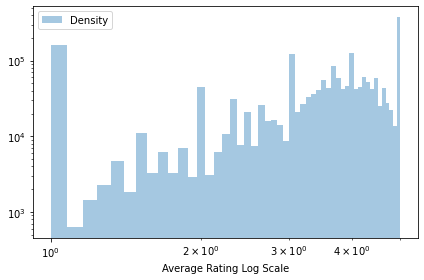

In [140]:
sns.distplot(x =user_df[user_df_cont], kde=False, axlabel='Average Rating Log Scale', label='Density')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()

In [18]:
user_df.to_pickle('user_df.pkl')

### Feature Engineering for User df
We have done following feature engineering in our dataframe for the reasons listed below
1. yelping_since_year : We have taken the year part from the yelping since column which earlier had a time stamp. In this way we are able to categorize how many users are yelping since each year. We have also changed this to a categorical variable pertaining to its low cardinality. 

2. no_of_friends : the dataset had a column friends with user_id's of people the user is friends with. We have simply taken into account how many friends does the user have on yelp. On a later stage we would like to see how user-user mapping can be used to make a better recommendation system but we will consider this as out of scope for our baseline model 

3. no_of_years_elite : The column listed the years where the user was considered an elite user. We have opted to keep the information as how many years the user was rated elite. We have changed this column to categorical pertaining to its low cardinality.

4. We have dropped the columns 'friends', 'elite', 'yelping_since', 'name'. 

5. We have kept all the attributes listed by yelp about the user as there might be some information as to how the user will rate a particular rest. based based on these features. We plan to discretize these varibles in the later parts of the EDA 

<AxesSubplot:xlabel='no_of_friends', ylabel='Count'>

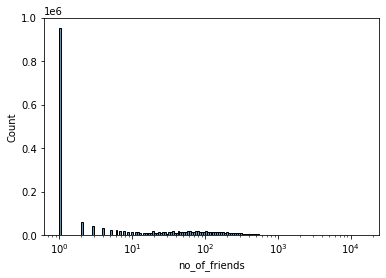

In [19]:
#number of friends a person has on yelp on log scale 
sns.histplot(user_df['no_of_friends'], log_scale=True)

# TIPS Dataset 

In [141]:
tip_df = read_json(tip_json_path)

In [142]:
tip_df.head()

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


In [143]:
tip_df.dtypes

user_id             object
business_id         object
text                object
date                object
compliment_count     int64
dtype: object

In [149]:
#change type to datetime 
tip_df['date'] = pd.to_datetime(tip_df['date'], infer_datetime_format=True)
#get year when tip was given
tip_df['tip_year'] = pd.DatetimeIndex(tip_df['date']).year
tip_df['tip_month'] = pd.DatetimeIndex(tip_df['date']).month
tip_df['tip_day_of_month'] = pd.DatetimeIndex(tip_df['date']).day

In [150]:
table_report(tip_df)

Table Shape (1320761, 8)


In [151]:
# tip_year and compliment count to categorical dtype
#should change compliment count to zero indicator variable
tip_df['tip_year'] = tip_df.tip_year.astype('category')
tip_df['tip_month'] = tip_df.tip_month.astype('category')
tip_df['compliment_count'] = tip_df.compliment_count.astype('category')

In [152]:
#removing text, date from tips_df
tip_df_without_token = tip_df.drop(columns = ['text'], axis=1)

In [153]:
table_report(tip_df_without_token)

Table Shape (1320761, 7)


,dtype,nulls,uniques,num_uniques,value_counts
user_id,object,0,"[hf27xTME3EiCp6NL6VtWZQ, uEvusDwoSymbJJ0auR3muQ, AY-laIws3S7YXNl_f_D6rQ, Ue_7yUlkEbX4AhnYdUfL7g, LltbT_fUMqZ-ZJP-vJ84IQ, HHNBqfbDR8b1iq-QGxu8ww, r0j4IpUbcdC1-HfoMYae4w, gxVQZJVeKBUk7jEhSyqv-A, 2hdR7KYAmnCk2FjTnPFsuw, DsWg3leomfasGs3j0rOfbQ, dLWDy4yzVzMQuhjoEcRO0g, SF83eQjb7XUiXuZVzMtzjQ, oLHQ-31LcRobRxjRU6PrZA, jOW3BGthCDL3l7Dd6AWZtA, jJtMKVIUzdDG4xagIOSraA, XhGn2quN9IzMI4HkMSJ7nA, K3bzEv1h7CP-B92bNPhFUA, aqc3CnsHVD177hfh3QE3kg, 141lhbCGhduUaFs17MAnww, BpJygDyhzDf7Pw1Is_5zSA, 2EuPAGalYnP7eSxPgFCNDg, ALw8EN21lby0vWtfD6JfIw, coFjUcQ_z84LO77CR_n5Fg, Qw-ooK1dWeJ8n0nhrL1zJQ, tn9J2lERXLTcsLJ8isqHiQ, exEElE4pG-ZwoCMwoYddeg, CjHWRUKXhhley9N9NLS07Q, Ya7Y4KEMFLROBaokNeYeHg, bQ_ZH1lP-XLWggJNRKZw-g, 6oOu_qWnWbdBhyOgIySlvg, Cg189N5utFD_4VxXImPZjg, J-ZMQMjMhoJ6oTDZ_Y-MNw, 6-g1Aw92UoDijvc4k-wWdw, Eg5niduTCVnaIBzGmoLiVQ, 5hfrKyck8DBN96EN9VczUw, sxS7AX38FpMqQhKfj51DMA, nUQLFJ0DozX_Rjpo3Z34MA, Wi0VgIrbb8vqU6weyVw6tg, kM6ixuNax9knFfc8RPRjbQ, NfU0zDaTMEQ4-X9dbQWd9A, VtLdzz_1olnpRU6AuSsEVg, Yi5KGA-QvolRWNeDfzEKrw, 2_dwXLO9Mks-ZN6nVs4k9Q, _rhYsgWA03_D88d3xEGFvw, gqn_YgUm08MEjYhWo1nRsw, OyOvr0BRi-QHi2kNtmmICw, 8-elsQ1aqXXoOBBB6hzFsw, 29x-JgPLGUERLetTL20AyQ, rpK40ZN2rNFJLhfdlQqS-Q, rKxcEeL7ar09x5TumBVhkg, B820kFgFc1HyTFIuMoWH-w, _MfYDCxHmMIQtrIIUBPW5Q, 4Wg50q9gMmxKiM_ezkiIXg, KP6ZVuL1heE5zQ8WbkWSVQ, QCk-fw9GznmZMNuNP-eIzQ, 46-qsKjqR4vptCIYrHH1yw, U9gPvLS_qdhR_J-7xtRgNA, dt9IHwfuZs9D9LOH7gjNew, -fQPzH-e-ubDIiLQhybEjQ, oknzpMgHOnbijayveG-PKQ, rdysF0ymVkMX82Bu_8x3nA, 1O638BDK_fWuxgTVJwff-A, Jn5hv5T5biR56PW_DPj7JQ, kW2dk1CWihmh3g7k9N2G8A, aB19CdLufGNZxvZYivbohg, vnJtVdz_VMEse_fjlWKTfQ, 2CdbMotfKkuVH5mhPauxbQ, LisTsUqnQ5RoW6reg6hyWQ, cbDkfXdJqZx1kSOZDEC3fw, MydYq5iMmRNVNk4K-GnXgA, _NT4K3xZNt8qa_SXGVOXmg, U7htIjuZIBCfOZ-Pe2hptQ, CbmNBkKa9QKNxPiN_whFUw, 9EJPUru7ORXoCFF033zP7w, _ZsXsLg6rHvCzud00Pgk7w, J3buAe4i8UMCjlQ9zqLo7g, ctXFXk9-m6PCMoI-Nz2_XQ, kycD78Z75r167eiSG8X6Ww, 4d13xAX2jp2EbGF8I9eZZw, u0bAtrQrgEoHjFybAl9FeQ, dgAjJyH_B2aI0tsdUyjWyg, AlXx0P-OhUylep0jNi773g, 5gYF8vCPu6bs7kJ4dIB-9A, _ekUMPGWf4QB5uj6yAvGIw, 98S0b7UD-CGBGX0f4LPNvQ, nmxdKJ7GoKLpXCN-BEF63Q, BI4jBJVto2tEQ0NiaR0rNQ, 7sNE58P4AvsX6QHE8ypCiA, LnX7-WmpML5bY6Fzlz468g, pPSYwXRbjnFKBF9EDCUMeA, A0j21z2Q1HGic7jW6e9h7A, 8-c_N_vSkwVieg8sHn_Ppw, qRCm_RqQfQjqNFVQ5XJO4A, 8DGFWco9VeBAxjqsuh1aSw, 0sl4I8R7znWXp_K4A0nZ_w, 3nDUQBjKyVor5wV0reJChg, xq1zRJz5VHgEKiCaI51_Gw, AX6_NL1_GTM2tcN9jn8mQw, Ez2-zXIgSGiV6vP5jUwUnw, Q1IENmNc6bdDruACmhy4mg, ...]",365869,NA
business_id,object,0,"[UYX5zL_Xj9WEc_Wp-FrqHw, Ch3HkwQYv1YKw_FO06vBWA, rDoT-MgxGRiYqCmi0bG10g, OHXnDV01gLokiX1ELaQufA, GMrwDXRlAZU2zj5nH6l4vQ, ALwAlxItASeEs2vYAeLXHA, d_L-rfS1vT3JMzgCUGtiow, 5FIOXmUE3qMviX9GafGH-Q, rcaPajgKOJC2vo_l3xa42A, hfBrethLHS9iXeBNR8MtzQ, _98ytLdlPEDp0FTuO31R7Q, ow3oP3cfmhlfmSsGaXe25Q, gG9z6zr_49LocyCTvSFg0w, w8RWhhuKxMiFCpvFvIQ3zg, -ed0Yc9on37RoIoG2ZgxBA, -wDNRL4lm1UgeFLG9KcrjQ, aLcFhMe6DDJ430zelCpd2A, yDWYuIDfXHckdJM5fxOb5g, UbSa8ddKsvMZgodku_7gBQ, XC06xxb7FFYsXcI2E38IIw, j8pUAS0qdEcPsjkqEDNbhw, 1i2zvEyKaxoHX6CyR4WdrQ, 58APdML-PG_OD4El2ePTvw, QZgtObG3H57Ev5FnjoGjFg, Jt28TYWanzKrJYYr0Tf1MQ, a4grXFNKZmZm0ZJXd1PVdQ, 9KR010S2MquncfcaRj1pCQ, XnIYdYRnuCX8PXGbZsBf-w, PQWE8a6Opjiuzt7DaX2R6Q, ubt9YKL8nT-1WMu2QLxuNg, MyTsAeShB9pcWP84GSTAdw, BLvcA14BVJYSPjaVnNUKFg, eSqMCXMPNYUaPbSN1HjifQ, ndQTAJzhhkrl1i5ToEGSZw, UPF6nUKB_kbMM44xiEc66g, VCRBTZBzWib3ngEFoOZing, D95WgKXol09A4kAfaw0dmQ, Ln_wIiEtyFCXogad7VTLfw, 220Z1EQZwj9IsUhT9SdLiQ, 5VXxZIMgoKRWbNa6x9kMfw, ILCRrpBIp8KTknEdgIpTxw, Egd-0nDgzZGEVA0R09yyUQ, Z_JkVkaUcN4ITVeuG-4Qtw, Hq-I1CmsR6X77aOYfXGYMA, QrTvQw_aZOLk_8FZ8tQ_-w, L5nUCYaZ1UGRp58tH6BQgA, 9IFvZw83W8qKpEEJrhXpgg, 6H78unzSy1z4AafKHIsmTQ, qpmd3uD2ffE29J6wK-RkrQ, OgJ0KxwJcJ9R5bUK0ixCbg, vflFNEBMH1GSSjvZx3ItdA, -76didnxGiiMO80BjSpYsQ, Eis_z-uF_2gUf83UE9blog, 7tdVsSDXRKtLLC-fD1hJ-A, 6TvB1PZCY1Ap2S-yNJPs4w, KuyB4pILxj4pKHvbY6CrJg, _vMJVm1v5Jp4uUqZIuGyvA, M5lsAGp-jPwzHAVfIaEx6g, qD_JdN9HpuuXtJv4C6jmCw, oYWixgv1kiPV1j02TYzaPA, DZwR0EIPKlmC3mMLhTkqcQ, qWflasEfK2strQg5Ulcz4w, QlgSSTli

In [154]:
tip_df_without_token.to_pickle('tip_df_without_token.pkl')

### Bag of words - for text column in tips_df
#### DO NOT RUN AGAIN FOR NOW

In [198]:
def stemming(text):
    #stems each word in teh review to it's root word 
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [199]:
def preprocess_review(text):
    clean_review = text.lower()
    clean_review = re.sub(('[^a-z\s]+'), ' ', clean_review)
    clean_review = re.sub(('\s+'), ' ', clean_review)
    stemming_review = stemming(clean_review)
    #print(stemming_review)
    return stemming_review

In [200]:
tip_df.head()

,user_id,business_id,text,date,compliment_count,tip_year,tip_month,tip_day_of_month
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0,2013,11,26
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0,2014,6,15
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,2016,7,18
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,2014,6,6
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,2011,4,8


In [201]:
sample_text = tip_df.loc[2][2]

In [202]:
preprocess_review(sample_text)

'veri nice good servic good food'

In [203]:
tip_df['stemmed_review'] = tip_df['text'].apply(lambda x: preprocess_review(x))

In [207]:
tip_df

,user_id,business_id,text,date,compliment_count,tip_year,tip_month,tip_day_of_month,stemmed_review
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0,2013,11,26,here for a quick mtg
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0,2014,6,15,cucumb strawberri refresh
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,2016,7,18,veri nice good servic good food
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,2014,6,6,it s a small place the staff is friendli
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,2011,4,8,sandwich total what a bargain and the sandwich...
...,...,...,...,...,...,...,...,...,...
1320756,ayaRhAPJxrP-AQq6KeiBhg,ImkAc07Pppz0D3KC4iBTng,I love this place,2019-05-03 23:53:17,0,2019,5,3,i love thi place
1320757,PWX9qW1zOXKyILZAtP8OTQ,nizlIF4pl2_6zZkFITBApA,"Amazing cookies, great staff, great delivery! ...",2019-05-02 00:09:01,0,2019,5,2,amaz cooki great staff great deliveri can t th...
1320758,99L0bntmbChEwShH440C2Q,10jP6njt3elD90gaHF1FBQ,Just perfect. Had this ice cream 3 times in 1 ...,2019-08-05 01:53:37,0,2019,8,5,just perfect had thi ice cream time in week no...
1320759,I8DpwNemLrFnAuCAYmu_sw,gA9hCYY7MYl9oZ3aym5dvw,Orgasm rolls are on point!!!,2019-03-29 23:36:01,0,2019,3,29,orgasm roll are on point


In [204]:
tokenizer = CountVectorizer(max_features=80, stop_words = 'english')

In [205]:
tokenizer.fit(tip_df['stemmed_review'])
stemmed_tokenized_review = tokenizer.transform(tip_df['stemmed_review'])
stemmed_tokenized_review.shape

(1320761, 80)

In [209]:
stemmed_tokenized_df = pd.DataFrame(stemmed_tokenized_review.toarray(), columns=tokenizer.get_feature_names())
stemmed_tokenized_df

,alway,amaz,ask,atmospher,awesom,bar,beer,best,better,breakfast,...,thi,time,tri,ve,vega,veri,wa,wait,want,work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320756,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1320757,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1320758,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1320759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
tips_stem_token_df = pd.concat([tip_df, stemmed_tokenized_df], axis=1)

In [73]:
tips_stem_token_df

,user_id,business_id,text,date,compliment_count,tip_year,stemmed_review,0
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0,2013,here for a quick mtg,
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0,2014,cucumb strawberri refresh,
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,2016,veri nice good servic good food,"(0, 27)\t1\n (0, 32)\t2\n (0, 49)\t1\n (0..."
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,2014,it s a small place the staff is friendli,"(0, 31)\t1\n (0, 57)\t1\n (0, 67)\t1"
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,2011,sandwich total what a bargain and the sandwich...,"(0, 4)\t1"
...,...,...,...,...,...,...,...,...
1320756,ayaRhAPJxrP-AQq6KeiBhg,ImkAc07Pppz0D3KC4iBTng,I love this place,2019-05-03 23:53:17,0,2019,i love thi place,"(0, 43)\t1\n (0, 57)\t1\n (0, 70)\t1"
1320757,PWX9qW1zOXKyILZAtP8OTQ,nizlIF4pl2_6zZkFITBApA,"Amazing cookies, great staff, great delivery! ...",2019-05-02 00:09:01,0,2019,amaz cooki great staff great deliveri can t th...,"(0, 1)\t1\n (0, 34)\t2\n (0, 67)\t1"
1320758,99L0bntmbChEwShH440C2Q,10jP6njt3elD90gaHF1FBQ,Just perfect. Had this ice cream 3 times in 1 ...,2019-08-05 01:53:37,0,2019,just perfect had thi ice cream time in week no...,"(0, 38)\t1\n (0, 70)\t1\n (0, 71)\t1"
1320759,I8DpwNemLrFnAuCAYmu_sw,gA9hCYY7MYl9oZ3aym5dvw,Orgasm rolls are on point!!!,2019-03-29 23:36:01,0,2019,orgasm roll are on point,


# Combining user_df and tip_df

In [155]:
combined_df = tip_df_without_token.merge(user_df, how='inner', on='user_id')

In [156]:
combined_df

,user_id,business_id,date,compliment_count,tip_year,tip_month,tip_day_of_month,review_count,useful,funny,...,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,yelping_since_year,no_of_friends,no_of_years_elite
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,2013-11-26 18:20:08,0,2013,11,26,64,284,154,...,0,28,30,61,61,15,11,2010,1099,1
1,hf27xTME3EiCp6NL6VtWZQ,plWuv4gda7m0KlqCNhrb4w,2013-12-09 02:59:44,0,2013,12,9,64,284,154,...,0,28,30,61,61,15,11,2010,1099,1
2,hf27xTME3EiCp6NL6VtWZQ,YPavuOh2XsnRbLfl0DH2lQ,2013-12-11 00:50:59,0,2013,12,11,64,284,154,...,0,28,30,61,61,15,11,2010,1099,1
3,hf27xTME3EiCp6NL6VtWZQ,BgthHqiXot2s4Sd_xcI6DQ,2014-01-11 02:13:56,0,2014,1,11,64,284,154,...,0,28,30,61,61,15,11,2010,1099,1
4,hf27xTME3EiCp6NL6VtWZQ,Vu641FmSuZcUBI8PymYRIg,2013-12-14 02:00:31,0,2013,12,14,64,284,154,...,0,28,30,61,61,15,11,2010,1099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320756,fYbyObr_JUDbB7CoSeRj_Q,BjrKNWhtQkedHw8hP_0Bjg,2019-04-12 02:13:21,0,2019,4,12,1,0,0,...,0,0,0,0,0,0,0,2017,1,1
1320757,PWX9qW1zOXKyILZAtP8OTQ,nizlIF4pl2_6zZkFITBApA,2019-05-02 00:09:01,0,2019,5,2,2,2,0,...,0,0,0,0,0,0,0,2018,1,1
1320758,99L0bntmbChEwShH440C2Q,10jP6njt3elD90gaHF1FBQ,2019-08-05 01:53:37,0,2019,8,5,6,1,0,...,0,1,0,0,0,0,0,2019,18,1
1320759,I8DpwNemLrFnAuCAYmu_sw,gA9hCYY7MYl9oZ3aym5dvw,2019-03-29 23:36:01,0,2019,3,29,1,0,0,...,0,0,0,0,0,0,0,2019,45,1


In [157]:
table_report(combined_df)

Table Shape (1320761, 27)


,dtype,nulls,uniques,num_uniques,value_counts
user_id,object,0,"[hf27xTME3EiCp6NL6VtWZQ, uEvusDwoSymbJJ0auR3muQ, AY-laIws3S7YXNl_f_D6rQ, Ue_7yUlkEbX4AhnYdUfL7g, LltbT_fUMqZ-ZJP-vJ84IQ, HHNBqfbDR8b1iq-QGxu8ww, r0j4IpUbcdC1-HfoMYae4w, gxVQZJVeKBUk7jEhSyqv-A, 2hdR7KYAmnCk2FjTnPFsuw, DsWg3leomfasGs3j0rOfbQ, dLWDy4yzVzMQuhjoEcRO0g, SF83eQjb7XUiXuZVzMtzjQ, oLHQ-31LcRobRxjRU6PrZA, jOW3BGthCDL3l7Dd6AWZtA, jJtMKVIUzdDG4xagIOSraA, XhGn2quN9IzMI4HkMSJ7nA, K3bzEv1h7CP-B92bNPhFUA, aqc3CnsHVD177hfh3QE3kg, 141lhbCGhduUaFs17MAnww, BpJygDyhzDf7Pw1Is_5zSA, 2EuPAGalYnP7eSxPgFCNDg, ALw8EN21lby0vWtfD6JfIw, coFjUcQ_z84LO77CR_n5Fg, Qw-ooK1dWeJ8n0nhrL1zJQ, tn9J2lERXLTcsLJ8isqHiQ, exEElE4pG-ZwoCMwoYddeg, CjHWRUKXhhley9N9NLS07Q, Ya7Y4KEMFLROBaokNeYeHg, bQ_ZH1lP-XLWggJNRKZw-g, 6oOu_qWnWbdBhyOgIySlvg, Cg189N5utFD_4VxXImPZjg, J-ZMQMjMhoJ6oTDZ_Y-MNw, 6-g1Aw92UoDijvc4k-wWdw, Eg5niduTCVnaIBzGmoLiVQ, 5hfrKyck8DBN96EN9VczUw, sxS7AX38FpMqQhKfj51DMA, nUQLFJ0DozX_Rjpo3Z34MA, Wi0VgIrbb8vqU6weyVw6tg, kM6ixuNax9knFfc8RPRjbQ, NfU0zDaTMEQ4-X9dbQWd9A, VtLdzz_1olnpRU6AuSsEVg, Yi5KGA-QvolRWNeDfzEKrw, 2_dwXLO9Mks-ZN6nVs4k9Q, _rhYsgWA03_D88d3xEGFvw, gqn_YgUm08MEjYhWo1nRsw, OyOvr0BRi-QHi2kNtmmICw, 8-elsQ1aqXXoOBBB6hzFsw, 29x-JgPLGUERLetTL20AyQ, rpK40ZN2rNFJLhfdlQqS-Q, rKxcEeL7ar09x5TumBVhkg, B820kFgFc1HyTFIuMoWH-w, _MfYDCxHmMIQtrIIUBPW5Q, 4Wg50q9gMmxKiM_ezkiIXg, KP6ZVuL1heE5zQ8WbkWSVQ, QCk-fw9GznmZMNuNP-eIzQ, 46-qsKjqR4vptCIYrHH1yw, U9gPvLS_qdhR_J-7xtRgNA, dt9IHwfuZs9D9LOH7gjNew, -fQPzH-e-ubDIiLQhybEjQ, oknzpMgHOnbijayveG-PKQ, rdysF0ymVkMX82Bu_8x3nA, 1O638BDK_fWuxgTVJwff-A, Jn5hv5T5biR56PW_DPj7JQ, kW2dk1CWihmh3g7k9N2G8A, aB19CdLufGNZxvZYivbohg, vnJtVdz_VMEse_fjlWKTfQ, 2CdbMotfKkuVH5mhPauxbQ, LisTsUqnQ5RoW6reg6hyWQ, cbDkfXdJqZx1kSOZDEC3fw, MydYq5iMmRNVNk4K-GnXgA, _NT4K3xZNt8qa_SXGVOXmg, U7htIjuZIBCfOZ-Pe2hptQ, CbmNBkKa9QKNxPiN_whFUw, 9EJPUru7ORXoCFF033zP7w, _ZsXsLg6rHvCzud00Pgk7w, J3buAe4i8UMCjlQ9zqLo7g, ctXFXk9-m6PCMoI-Nz2_XQ, kycD78Z75r167eiSG8X6Ww, 4d13xAX2jp2EbGF8I9eZZw, u0bAtrQrgEoHjFybAl9FeQ, dgAjJyH_B2aI0tsdUyjWyg, AlXx0P-OhUylep0jNi773g, 5gYF8vCPu6bs7kJ4dIB-9A, _ekUMPGWf4QB5uj6yAvGIw, 98S0b7UD-CGBGX0f4LPNvQ, nmxdKJ7GoKLpXCN-BEF63Q, BI4jBJVto2tEQ0NiaR0rNQ, 7sNE58P4AvsX6QHE8ypCiA, LnX7-WmpML5bY6Fzlz468g, pPSYwXRbjnFKBF9EDCUMeA, A0j21z2Q1HGic7jW6e9h7A, 8-c_N_vSkwVieg8sHn_Ppw, qRCm_RqQfQjqNFVQ5XJO4A, 8DGFWco9VeBAxjqsuh1aSw, 0sl4I8R7znWXp_K4A0nZ_w, 3nDUQBjKyVor5wV0reJChg, xq1zRJz5VHgEKiCaI51_Gw, AX6_NL1_GTM2tcN9jn8mQw, Ez2-zXIgSGiV6vP5jUwUnw, Q1IENmNc6bdDruACmhy4mg, ...]",365869,NA
business_id,object,0,"[UYX5zL_Xj9WEc_Wp-FrqHw, plWuv4gda7m0KlqCNhrb4w, YPavuOh2XsnRbLfl0DH2lQ, BgthHqiXot2s4Sd_xcI6DQ, Vu641FmSuZcUBI8PymYRIg, N5B7OBTyNGgwU_Y2fwNcyw, zU9w_xRlQSRIYXxGo-HSOA, RvXRaznj3_XpMt_5QWmg_w, _guNmxJd4Ep6S3pBZdAjGA, qaPSbg690KaX5av6xsSV4Q, DL7V1_chkWkZtyG4_xNYfw, 8-_jXGGDFPFAPB4r1x-81w, VrIskBdLuRxS0HsSimJOhA, D3dAx-QW_uuClz4MambeHA, IiwgHkUbBt9Ha25H4dUtkw, mnwRtuVQEsIUomBchu0gwg, lgWB0yGXpZvupYREWxtV7g, wUKzaS1MHg94RGM6z8u9mw, SfkPbEnDtc1EVTjuS0DDUw, 7_08jLr277WpzXkcERXhjA, DnV2o694nhnjuRmyR39l3Q, p81LV6y6Jxz_q_3HL06jOw, wHq1efQVz17338k_aUOX3w, Hw-yFY8Fz8HOvY6I5l7Ljg, IZq8vOqGy__PMUnYJbiHuw, pjpUOlJLlkIxBZ5BquA2PA, aNYunG3j5zNJ4F0dQcZMyQ, __aKnGBedQ51_hEc3D9ARw, OgJ0KxwJcJ9R5bUK0ixCbg, ko1v9-BdTqZQWmx4DIHWaw, i6G3zsEJIqpGktMWyffXjw, 4dCOilGYflzGzizOPKyvow, rcaPajgKOJC2vo_l3xa42A, NJ0RzuWd5xDqfJejYQZ65g, Wxxvi3LZbHNIDwJ-ZimtnA, piHJq_NDrOh5SYk3AyQVOg, 9yESUcIVarhYEabIMj844Q, C9mrAke0xSBuglYJOK55Ag, Ns20WGWn6s6niKAGIQB4UQ, 4AcoF4VeKal1eOfyf3Qg-Q, cTJjTKz2huGZ-ElScC2pSw, dIqMQYs6tmowQUygS8sQ6A, vcMD6mZfvjtAxuCMoAfSNA, qnn9E-e9orYf_wK37yLTYw, siXCBrVFOXicbM2R-33-8w, CQokoa1vN8j6OP7dyizJDw, JHU3SbUz2UF1cVgnlNoK8Q, ZiTaYmacCUOzaYQ4DSygiw, ept9mIlqGIsemr6w0RczaA, mhL4vCKi7oW1lVZXk3mTkw, uwjKE9Sdx_6kDKiMRcSe8Q, j5Frq1c9SbErsceq71Tyzg, tuIg103yDqCEcTk5J_h8ow, DMmeFKsUuMl0kDy7Zd7W3A, YT_kQXNKtR0UuKrqUoBYPA, g-I48SaHtdIGR5ZEoVeNFw, Ql5npMMRWKurN99tgA-g5w, 4r5yWUyeo2EDc5DDsAMh9A, YJ8ljUhLsz6CtT_2ORNFmg, vjaHGc25CcyNPZTbjDa7Ww, D3ehpx1uKG5aLuaJgztYDg, 2FfZUyA82YhQCjWNiqDCzQ, 9a3DrZvp

In [158]:
identity_cols = list(combined_df.select_dtypes(['object']).columns)
cat_cols = list(combined_df.select_dtypes(['category']).columns)
int_cols = list(combined_df.select_dtypes(['int']).columns)
cont_cols = list(combined_df.select_dtypes(['float']).columns)

In [159]:
int_cols

['tip_day_of_month',
 'review_count',
 'useful',
 'funny',
 'cool',
 'fans',
 'compliment_hot',
 'compliment_more',
 'compliment_profile',
 'compliment_cute',
 'compliment_list',
 'compliment_note',
 'compliment_plain',
 'compliment_cool',
 'compliment_funny',
 'compliment_writer',
 'compliment_photos',
 'no_of_friends']

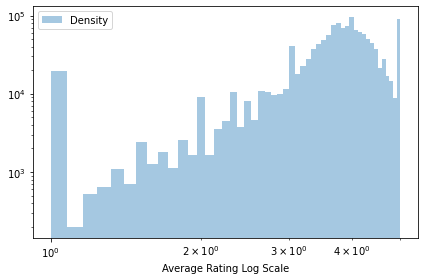

In [117]:
#log scale
sns.distplot(x =combined_df[cont_cols], kde=False, axlabel='Average Rating Log Scale', label='Density')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()

In [167]:
cat_cols

['compliment_count',
 'tip_year',
 'tip_month',
 'yelping_since_year',
 'no_of_years_elite']

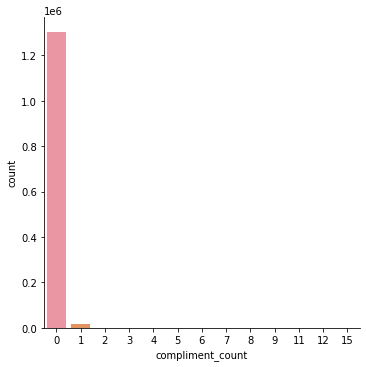

In [126]:
sns.catplot(data=combined_df, x='compliment_count',  kind='count')

Make compliment count zero indicating variable 

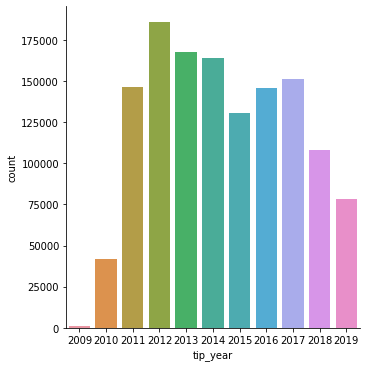

In [127]:
sns.catplot(data=combined_df, x='tip_year',  kind='count')

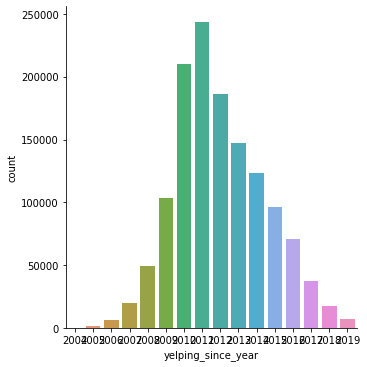

In [128]:
sns.catplot(data=combined_df, x='yelping_since_year',  kind='count')

No of active user and tip year - Interaction term 

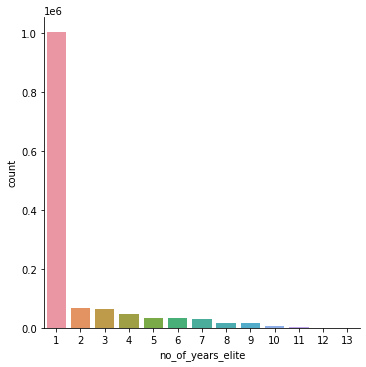

In [130]:
sns.catplot(data=combined_df, x='no_of_years_elite',  kind='count')

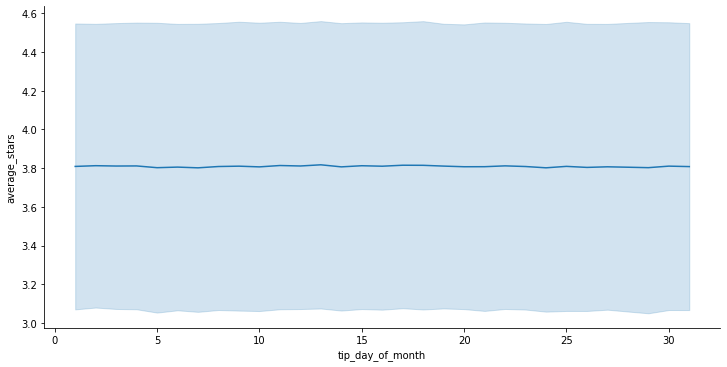

In [165]:
sns.relplot(data=combined_df, x='tip_day_of_month', y='average_stars', kind='line', ci='sd', aspect=2)

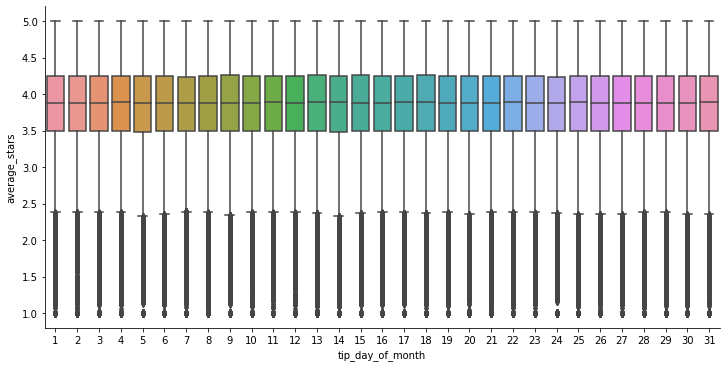

In [166]:
sns.catplot(data=combined_df, x='tip_day_of_month', y='average_stars', kind='box', aspect=2)

No Relation between tip day of the month and average ratings 

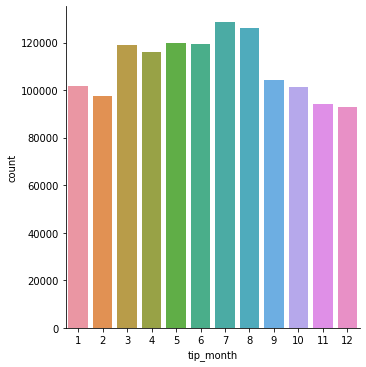

In [168]:
sns.catplot(data=combined_df, x='tip_month',  kind='count')

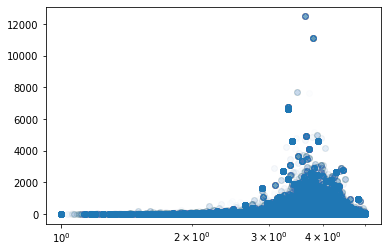

In [185]:
plt.scatter(combined_df['average_stars'], combined_df.review_count, alpha=0.01)
plt.xscale('log')


People with higher review count tend to have a higher average rating.

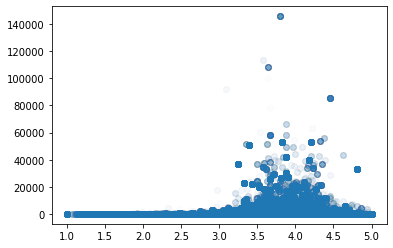

In [188]:
plt.scatter(combined_df['average_stars'], combined_df.useful, alpha=0.01)
#plt.xscale('log')


In [1]:
plt.scatter(combined_df['average_stars'], combined_df.no_of_friends, alpha=0.01)

NameError: name 'plt' is not defined

People with more number of friends tend to have higher rating

# BUSINESS DF DATASET

In [190]:
business_df = read_json(business_jason_path)


In [191]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


# Merging User-Business df

In [211]:
business_df.shape

(209393, 14)

In [212]:
toronto_df = business_df[business_df['city']=='Toronto']
toronto_df.shape

(20366, 14)

In [213]:
toronto_df = toronto_df[toronto_df['is_open'] == 1]
toronto_df.shape

(14962, 14)

In [214]:
toronto_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
9,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Martial Arts, Gyms, Fitness & Instruction, Act...","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
26,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,Toronto,ON,M5B 1R4,43.656542,-79.381308,4.0,9,1,"{'RestaurantsPriceRange2': '3', 'BikeParking':...","Shopping, Shoe Stores, Fashion","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
52,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,Toronto,ON,M1L 2L9,43.727189,-79.293008,3.5,7,1,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Cosmetics & Beauty Supply, Shopping, Beauty & ...",None
73,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,116,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': 'u'b...","Vietnamese, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
74,OT-8IUWo_2M-rHddjzz_Cg,Equipment Sales and Long Term Rentals - Redlin...,"510 Coronation Dr. Unit #18, Unit 18",Toronto,ON,M1E 4X6,43.765266,-79.166977,1.5,3,1,{'WheelchairAccessible': 'True'},"Event Planning & Services, Photo Booth Rentals...",{'Monday': '9:0-17:0'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209351,0hudPyuCBlKg79OwKBw-eQ,The Black Bull,298 Queen Street W,Toronto,ON,M5V 2A1,43.649634,-79.393307,2.5,153,1,"{'Alcohol': 'u'full_bar'', 'NoiseLevel': 'u'av...","Pubs, Bars, Nightlife","{'Monday': '12:0-2:0', 'Tuesday': '12:0-2:0', ..."
209359,GAgEoHcf4PSuZRS5Zd3ltA,Q's Shawarma,1075 Martin Grove Road,Toronto,ON,M9W 4W6,43.701807,-79.575135,4.0,16,1,"{'GoodForKids': 'True', 'HasTV': 'True', 'Rest...","Restaurants, Mediterranean","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
209374,BtTCTHwoIfr3fBQjaOkpIw,Starbucks,81 Front Street E,Toronto,ON,M5E 1B8,43.648727,-79.372506,4.0,22,1,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...","Coffee & Tea, Food","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
209377,n2BKYb8aw4AhRKLkdUjQRg,Steak & Cheese & Quick Pita Restaurant,199 College St,Toronto,ON,M5T 1P9,43.658683,-79.395071,2.5,21,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Sandwiches, Restaurants",None


In [215]:
toronto_df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

KeyError: "None of [Float64Index([-79.5291079302,    -79.3813076,    -79.2930079, -79.3487726589,\n              -79.1669769712,    -79.4181223,    -79.4008849,    -79.3846434,\n                 -79.3820602,    -79.4139395,\n              ...\n                 -79.3967618,    -79.3817439,     -79.480365,    -79.4020982,\n              -79.2348606243,    -79.3933071,    -79.5751352,    -79.3725058,\n                 -79.3950713,    -79.3927559],\n             dtype='float64', length=14962)] are in the [columns]"

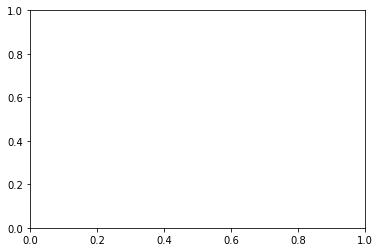

In [224]:
toronto_df.plot(kind='scatter', x=toronto_df['longitude'], y = toronto_df['latitude'])#, s=toronto_df['stars']*20, c='stars', cmap=plt.get_cmap('jet'), colorvar=True,alpha =0.1)

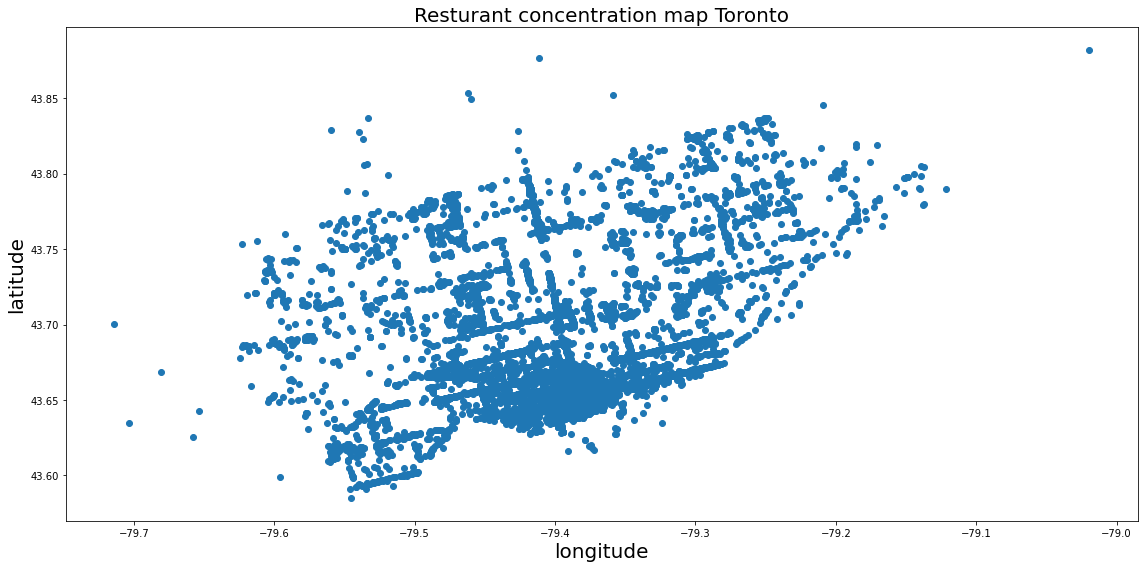

In [227]:
plt.figure(figsize=(16,8))
plt.scatter(x=toronto_df['longitude'], y = toronto_df['latitude'])
plt.xlabel('longitude', fontsize=20)
plt.ylabel('latitude', fontsize=20)
plt.title('Resturant concentration map Toronto', fontsize=20)
plt.tight_layout()

In [97]:
user_business_df = toronto_df.merge(combined_df, how='inner', on='business_id')

In [98]:
user_business_df

,business_id,name_x,address,city,state,postal_code,latitude,longitude,stars,review_count_x,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,no_of_friends,no_of_years_elite
0,EosRKXIGeSWFYWwpkbhNnA,Xtreme Couture,700 Kipling Avenue Etobicoke,Toronto,ON,M8Z 5G3,43.624539,-79.529108,3.0,16,...,32,21,1390,4861,1342,1342,397,331,3727,7
1,1wWneWD_E1pBIyVpdHMaQg,Air Jordan Store,306 Yonge Street,Toronto,ON,M5B 1R4,43.656542,-79.381308,4.0,9,...,0,0,106,222,210,210,90,18,170,6
2,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,Toronto,ON,M1L 2L9,43.727189,-79.293008,3.5,7,...,129,34,838,2241,3069,3069,505,2635,624,3
3,9JCjKd6eFXsAMVwouTh_4Q,Bath and Body Works,1900 Eglintion Ave E,Toronto,ON,M1L 2L9,43.727189,-79.293008,3.5,7,...,0,0,2,0,0,0,1,0,14,1
4,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,116,...,6,22,83,221,142,142,78,22,110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59678,BtTCTHwoIfr3fBQjaOkpIw,Starbucks,81 Front Street E,Toronto,ON,M5E 1B8,43.648727,-79.372506,4.0,22,...,0,0,1,1,1,1,2,3,11,1
59679,BtTCTHwoIfr3fBQjaOkpIw,Starbucks,81 Front Street E,Toronto,ON,M5E 1B8,43.648727,-79.372506,4.0,22,...,2,2,65,71,71,71,45,17,83,2
59680,BtTCTHwoIfr3fBQjaOkpIw,Starbucks,81 Front Street E,Toronto,ON,M5E 1B8,43.648727,-79.372506,4.0,22,...,1,0,18,25,23,23,10,22,341,4
59681,BtTCTHwoIfr3fBQjaOkpIw,Starbucks,81 Front Street E,Toronto,ON,M5E 1B8,43.648727,-79.372506,4.0,22,...,0,0,1,0,0,0,0,0,3,1


We get 59683 columns where the users have been to the resturants in the city of Toronto Canada